In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
base_folder = 'D:/REPOS/LeanSTP/Tests/TestData/'

The implementation passes the tests with this external data.

In [6]:
spy = pd.read_csv(base_folder + 'spy_10_min.txt', index_col=0, parse_dates=True)
# Estimate the MACD
spy['MACD'] = (spy.Close.ewm(span=12,min_periods=12,adjust=False).mean() -
               spy.Close.ewm(span=26,min_periods=26,adjust=False).mean())

spy.to_csv(base_folder + 'spy_macd.csv')

Now, Jared's external data. The tests **fails** to pass with this data. 

In [4]:
external_data = pd.read_csv(base_folder + 'macd-12-26-9-ema.txt', index_col=0, parse_dates=True)

Let's apply panda's generated MACD in the external data to peek why id the case.

In [7]:
external_data['PandasMACD'] = (external_data.Close.ewm(span=12,min_periods=12,adjust=False).mean() -
                               external_data.Close.ewm(span=26,min_periods=26,adjust=False).mean())

external_data.to_csv(base_folder + 'macd-12-26-9-ema.txt')

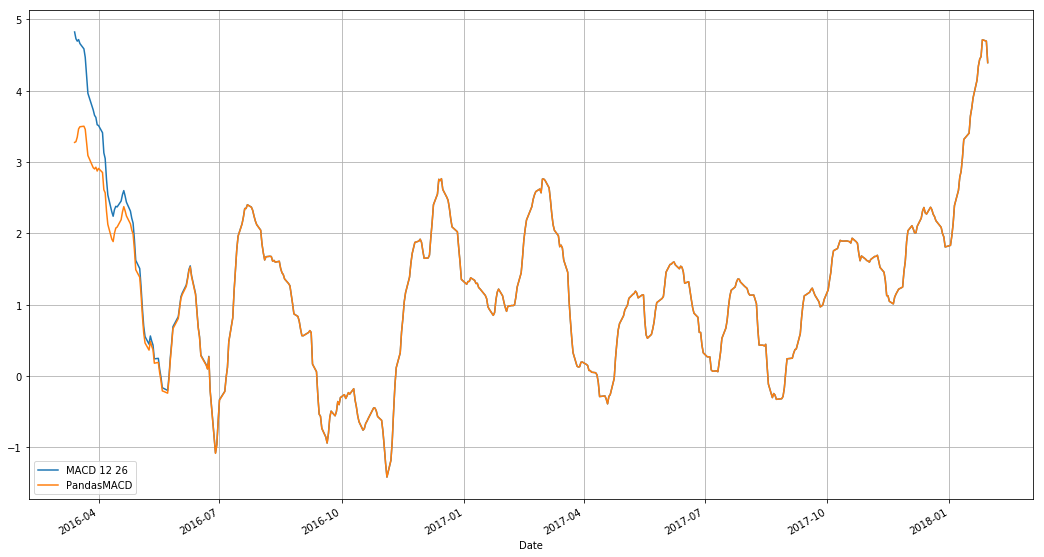

In [8]:
external_data.get(['MACD 12 26', 'PandasMACD']).plot(grid= True, figsize=(18, 10))

The problem whit the external data seems to be the warming up. Let's zoom in into the first 4 days.

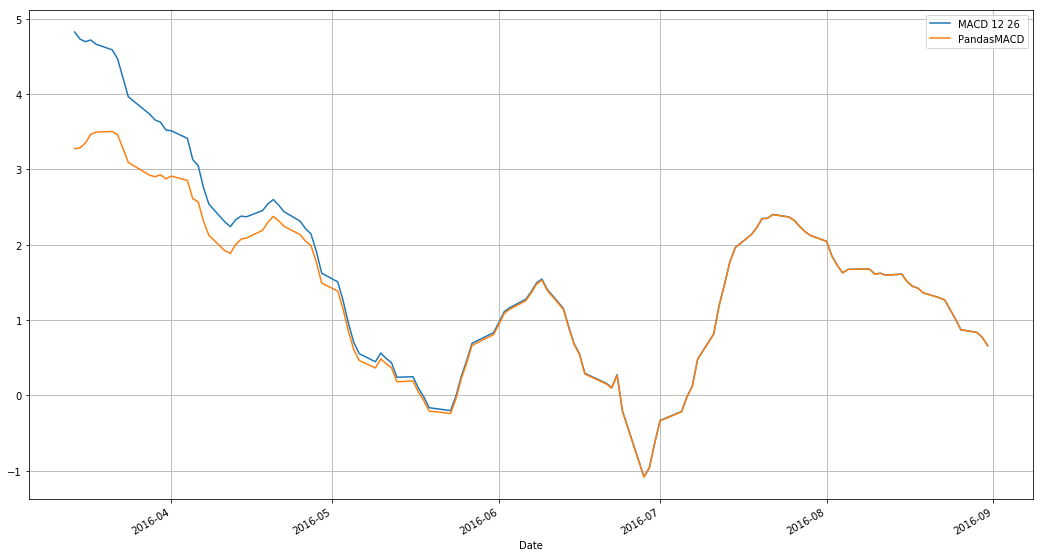

In [12]:
external_data.loc[:'2016-08', ['MACD 12 26', 'PandasMACD']].plot(grid= True, figsize=(18, 10))